In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
from matplotlib.pyplot import figure

In [2]:
natl_spending = "Resources/natlSpending.csv"
books_df = pd.read_csv(natl_spending)
natl_deficit = "Resources/Deficit.csv"
deficit_df = pd.read_csv(natl_deficit)

In [3]:
books_df["Current Month Receipt or Outlay Amount"] = books_df["Current Month Receipt or Outlay Amount"]/1000000000
books_df.head()
# receipts in billions of dollars

,Record Date,Classification Description,Current Month Receipt or Outlay Amount,Current FYTD Receipt or Outlay Amount,Prior FYTD Receipt or Outlay Amount
0,1/31/23,Budget Receipts,NaN,NaN,NaN
1,1/31/23,Individual Income Taxes,262.290000,7.668780e+11,8.245710e+11
2,1/31/23,Corporation Income Taxes,20.827936,1.262190e+11,1.122480e+11
3,1/31/23,Social Insurance and Retirement Receipts:,NaN,NaN,NaN
4,1/31/23,Employment and General Retirement (Off-Budget),108.259000,3.625770e+11,3.341480e+11


In [4]:
books_df['Record Date'] = pd.to_datetime(books_df['Record Date'])

# with the help of stack overflow to clean the dates included
cleaned_df = books_df[~(books_df['Record Date'] < '2019-07-01')]
cleaned_df = cleaned_df[~(cleaned_df['Record Date'] > '2022-07-01')]
cleaned_df.head()

,Record Date,Classification Description,Current Month Receipt or Outlay Amount,Current FYTD Receipt or Outlay Amount,Prior FYTD Receipt or Outlay Amount
395,2022-06-30,Budget Receipts,NaN,NaN,NaN
396,2022-06-30,Individual Income Taxes,200.815000,2.135470e+12,1.590660e+12
397,2022-06-30,Corporation Income Taxes,82.555448,3.060530e+11,2.651440e+11
398,2022-06-30,Social Insurance and Retirement Receipts:,NaN,NaN,NaN
399,2022-06-30,Employment and General Retirement (Off-Budget),106.313000,8.062520e+11,7.125670e+11


In [5]:
agriculture_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Agriculture']
education_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Education']
defense_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Defense--Military Programs']
energy_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Energy']
health_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Health and Human Services']
housing_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Housing and Urban Development']
unemployment_df = cleaned_df[cleaned_df['Classification Description'] == 'Unemployment Insurance']
labor_df = cleaned_df[cleaned_df['Classification Description'] == 'Department of Labor']

In [6]:
deficit_df.head()

,Record Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,3/3/23,2.465660e+13,6.803590e+12,3.146020e+13,1,2023,2,2023,1,3,3
1,3/2/23,2.463840e+13,6.822270e+12,3.146070e+13,1,2023,2,2023,1,3,2
2,3/1/23,2.465110e+13,6.807960e+12,3.145910e+13,1,2023,2,2023,1,3,1
3,2/28/23,2.460920e+13,6.850050e+12,3.145930e+13,1,2023,2,2023,1,2,28
4,2/27/23,2.461390e+13,6.842480e+12,3.145640e+13,1,2023,2,2023,1,2,27


In [7]:
deficit_df['Record Date'] = pd.to_datetime(deficit_df['Record Date'])

deficit_df = deficit_df[~(deficit_df['Record Date'] < '2019-07-01')]
deficit_df = deficit_df[~(deficit_df['Record Date'] > '2022-07-01')]
deficit_df = deficit_df.iloc[::-1]
deficit_df.head()

,Record Date,Debt Held by the Public,Intragovernmental Holdings,Total Public Debt Outstanding,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
922,2019-07-01,1.621410e+13,5.809020e+12,2.202310e+13,1,2019,4,2019,3,7,1
921,2019-07-02,1.620080e+13,5.822340e+12,2.202320e+13,1,2019,4,2019,3,7,2
920,2019-07-03,1.621590e+13,5.807060e+12,2.202300e+13,1,2019,4,2019,3,7,3
919,2019-07-05,1.621210e+13,5.811150e+12,2.202330e+13,1,2019,4,2019,3,7,5
918,2019-07-08,1.621000e+13,5.812750e+12,2.202280e+13,1,2019,4,2019,3,7,8


In [8]:
GDP = "Resources/GDP_and_Components.csv"
GDP_df = pd.read_csv(GDP)
GDP_df['Base Year'] = pd.to_datetime(GDP_df['Base Year'])

GDP_df = GDP_df[~(GDP_df['Base Year'] < '2019-07-01')]
GDP_df = GDP_df[~(GDP_df['Base Year'] > '2022-07-01')]
GDP_df.head()

,Base Year,"Gross Domestic Product, Nominal, Undjusted, Domestic Currency","Household Consumption Expenditure, incl. NPISHs, Nominal, Undjusted, Domestic Currency","Change in Inventories, Nominal, Undjusted, Domestic Currency","Exports of Goods and Services, Nominal, Undjusted, Domestic Currency","Imports of Goods and Services, Nominal, Undjusted, Domestic Currency","National Accounts, Constant Prices, Unadjusted","Gross Domestic Product, Real, Undjusted, Domestic Currency","Household Consumption Expenditure, incl. NPISHs, Real, Undjusted, Domestic Currency","Change in Inventories, Real, Undjusted, Domestic Currency",...,"National Accounts, Constant Prices, Seasonally Adjusted","Gross Domestic Product, Real, Seasonally Adjusted, Domestic Currency","Household Consumption Expenditure, incl. NPISHs, Real, Seasonally Adjusted, Domestic Currency","Govenment Final Consumption Expenditure, Real, Seasonally adjusted, Domestic Currency","Gross Fixed Capital Formation, Real, Seasonally Adjusted, Domestic Currency","Change in Inventories, Real, Seasonally Adjusted, Domestic Currency","Exports of Goods and Services, Real, Seasonally Adjusted, Domestic Currency","Imports of Goods and Services, Real, Seasonally Adjusted, Domestic Currency","Statistical Discrepancy in GDP, Real, Seasonally Adjusted, Domestic Currency","Gross Domestic Product, Deflator, Seasonally Adjusted"
0,2019-07-01,5397764.0,3612425.0,41092.0,634796.0,800804.0,...,4796221.0,3277060.0,38565.0,...,...,4782733.0,3287214.3,666694.3,1027902.8,17975.5,641752.5,869095.5,-6041.8,117.04
1,2019-10-01,5511056.0,3757996.0,-33223.0,646543.0,774682.0,...,4901993.0,3406167.0,-18802.0,...,...,4803922.8,3306402.3,670859.3,1025822.0,1205.3,642961.3,851165.0,-9563.8,117.47
2,2020-01-01,5254152.0,3510846.0,31052.0,590756.0,705124.0,...,4628460.0,3166575.0,22269.0,...,...,4747469.3,3254187.5,673125.8,1023924.8,-8588.5,616826.0,823873.3,-4813.8,117.95
3,2020-04-01,4930197.0,3265059.0,-89619.0,454560.0,584852.0,...,4335915.0,2952999.0,-104282.0,...,...,4344678.0,2954286.8,687408.0,955259.5,-69763.5,487842.0,679654.8,-18084.8,117.50
4,2020-07-01,5349433.0,3579847.0,37590.0,520893.0,712051.0,...,4701108.0,3212095.0,44900.0,...,...,4685930.0,3230595.3,674733.5,1006358.3,9198.3,548258.3,796045.0,-29048.5,118.52


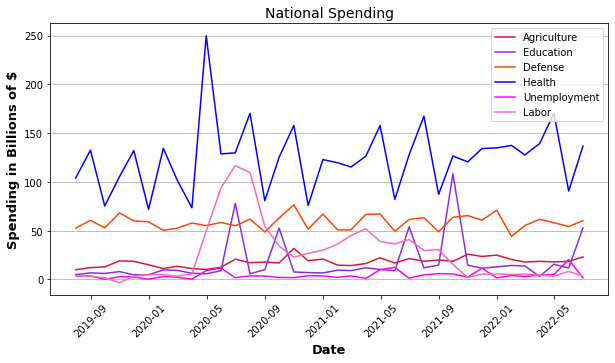

In [9]:
plt.figure(figsize=(10,5))

plt.plot(agriculture_df['Record Date'], agriculture_df['Current Month Receipt or Outlay Amount'], color='crimson')
plt.plot(education_df['Record Date'], education_df['Current Month Receipt or Outlay Amount'], color='blueviolet')
plt.plot(defense_df['Record Date'], defense_df['Current Month Receipt or Outlay Amount'], color='orangered')
plt.plot(health_df['Record Date'], health_df['Current Month Receipt or Outlay Amount'], color='blue')
plt.plot(unemployment_df['Record Date'], unemployment_df['Current Month Receipt or Outlay Amount'], color='magenta')
plt.plot(labor_df['Record Date'], labor_df['Current Month Receipt or Outlay Amount'], color='hotpink')

plt.ylabel("Spending in Billions of $", fontweight='bold', fontsize=13)
plt.xlabel("Date", fontweight='bold', fontsize=13)
plt.title("National Spending", fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Agriculture', 'Education','Defense','Health','Unemployment','Labor'],
          loc="upper right")

plt.grid(axis='y')
plt.show()

-In the graph above, we are comparing how our federal government chose to spend on each large department

-We have it grouped in Agriculture, Education, Defense, Health, Unemployment, and Labor. Agriculture, Defense, and Education more as our control group to see if spending was reduced or eliminated in those departments; Unemployment, Health, and Labor we used more to see how big of a change occurred in our timeframe and then how long until those departments leveled back to their regular spending amounts.

-From above, health appears to be the most erratic and for good reason. Each health spending increase comes mostly at each peak in COVID-19 cases or vaccine rollout. We see that labor spending increased near the middle of 2020 and stayed increased until the end of 2021. This also makes sense as many people were losing their jobs and the government needed to help people get back into the workforce during lockdown periods. Our other 4 departments stayed relatively constant throughout, which is especially surprising when it comes to Unemployment. From our perception as the public, it appeared stimulus checks and unemployment costs were at an all-time high at the peak of lockdown periods when most people were laid-off/took time away from work due to the pandemic. However, this shows that from the start of COVID-19 until now, the realtive spending in that area have been essentially the same. Possibly the biggest shocker is in education, as we see multiple peaks and valleys over the time period. What we notice, is that as health comes back down, education then peaks. To put it into real-world terms, as health and COVID-19 cases stabilized, extra emphasis was then placed on putting kids/teachers back in schools as a natural reaction to the seeming "end" to the pandemic. For defense and agriculture, we logically see very little/constant spending in those areas.

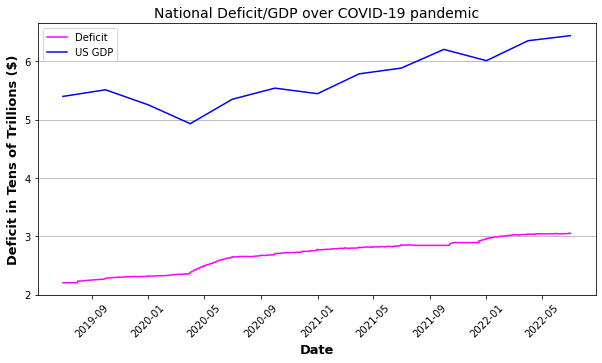

In [10]:
deficit_df['Total Public Debt Outstanding'] = deficit_df['Total Public Debt Outstanding']/10000000000000
GDP_df['Gross Domestic Product, Nominal, Undjusted, Domestic Currency'] = GDP_df['Gross Domestic Product, Nominal, Undjusted, Domestic Currency']/1000000
# setting deficit to trillions of dollars
plt.figure(figsize=(10,5))
plt.plot(deficit_df['Record Date'], deficit_df['Total Public Debt Outstanding'], color='fuchsia')
plt.plot(GDP_df['Base Year'], GDP_df['Gross Domestic Product, Nominal, Undjusted, Domestic Currency'], color='blue')
plt.xticks(rotation=45)
plt.xlabel("Date", fontweight='bold', fontsize=13)
plt.ylabel("Deficit in Tens of Trillions ($)", fontweight='bold', fontsize=13)
plt.title("National Deficit/GDP over COVID-19 pandemic", fontsize=14)
plt.legend(['Deficit', 'US GDP'], loc="best")
plt.grid(axis='y')
plt.show()

-In the graph above, we can see how GDP and the national deficit change over the course of our 3 year window

-For those that don't know, GDP stands for "Gross Domestic Product" and these strange words mushed together mean essentially the combined value of everything made, available and sold in our country in a given window of time (in our dataset this window calculates for every 3 months, or quarter of a year). 

-The good news that we can see is that as our deficit grows, our overall Gross Domestic Product which is good. If our deficit is going to increase, we at least want it to have a positive impact on our overall production and value of our goods. So, although we cannot claim causation between the two variables, we can conclude that there appears to be correlation between growth of our national deficit and growth of our GDP. However, let's perform some real statistical analysis to see if this is truly what the data is showing.

In [11]:
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import ttest_ind

# T-tests

-Now, let's perform some statistical analysis tests to show the realtions between some of our uncovered variables

-Because we are comparing to variables where we cannot assume normality (z-test), we will perform t-tests. In t-tests, we start with a given alpha value (significance level) and then calculate a p-value for a given comparison of multiple variables. If that p-value is greater than our $\alpha$ value (the standard $\alpha=0.05$), then we cannot conclude that the two have a relation; if our p-value is less than our $\alpha$ value, we can conclude with significant evidence that a relationship exists between the 2+ variables were are comparing in our t-test.

### Let's start with a comparison of GDP and the National Deficit

-We perform a t-test to potentially verify our original conclusion that the two have a positive correlation and have a significsnt relation. This would mean that our deficit does result in a better overall economy.

In [12]:
# Two sample t-test for deficit vs. GDP
deficit = deficit_df['Total Public Debt Outstanding']
GDP_set = GDP_df['Gross Domestic Product, Nominal, Undjusted, Domestic Currency']
t_stat, p_value = ttest_ind(deficit, GDP_set)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -40.17959542123599
P-Value:  5.603133735534638e-191


Using $\alpha = 0.05$, we see from our p-value that a significant relation between the two variables definitely exists. Since the p-value is essentially equal to 0, we can be very certain with this as this t-test indicates with essential certianty that the two have a statistically significant relation. This is a very sensible conclusion (and what we expect) as the more our federal government spends and takes out loans, the more our economy grows on the whole. If this were not the case, our economy would be dying and it would be a wider know country-crisis.

### Now let's compare GDP to Health spending

-To discover if GDP during COVID-19 changed as a result of health spending

In [13]:
# Two sample t-test for Health Spending vs. GDP
health_spend = health_df['Current Month Receipt or Outlay Amount']
t_stat, p_value = ttest_ind(health_spend, GDP_set)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  12.141765939098342
P-Value:  4.262328383269706e-16


Using $\alpha = 0.05$, we see from our p-value that a significant relation between the two variables once again exists. The certainty is not quite as strong as in our GDP vs Deficit test, but the p-value between the 2 variables is once again incredibly small meaning that a relationship exists. So as health spending increased, so did our GDP. This is to be expected since mask development, vaccine development and medical workers all contributed greatly to production and value of our country's products.

### Finally let's compare GDP to Unemployment spending

-Let's check out one of our more stable variables to make sure the validity of our past 2 tests. We can assume these 2 variables will have almost no realtion since we see almost no change in unemployment over the given time period.

In [14]:
# Two sample t-test for Unemployment Spending vs. GDP
un_spend = unemployment_df['Current Month Receipt or Outlay Amount']
t_stat, p_value = ttest_ind(un_spend, GDP_set)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  -1.0314541963671924
P-Value:  0.30760659133653384


Using $\alpha = 0.05$, we see that GDP and unemployment spending do not have a significant relationship. As we mentioned before, this is to be expected as our uneployment values stayed relatively constant. On the whole though, this is a very interesting result as it means the overall spending on unemployment during the pandemic had no real impact on the growth of our GDP. Logically, it does make sense though as the more unemployment benefits given out, the less we were producing and therefore contributing to our GDP

# Quick Summation of the intended question

-Our question: What happened to government spending? Explain GDP’s relationship to government spending

-We can see that government spending increased during the height of the pandemic but ultimately leveled back to normal now that we are (almost) out of the woods. The good news is that our increase in spending only had positive impacts on our economy and GDP, and we are able to observe through our t tests that GDP and spending do have a significant relation (meaning the increase in GDP uis due to the increase in spending). In more specific department relationships, unemployment spending had almost no effect on the increase in GDP while our health spending was greatly tied into our overall increase in GDP